<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M7_AI2_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PADAWAN*: 


##JOSE ARMANDO ALVARADO RUIZ

# **Tema 2. FRAMEWORKS**

**Entrega: TensorFlow y Pytorch**


# **Descripción de la tarea**

###Contexto

En la actualidad, disponemos de framework de Deep Learning, como Tensorflow o Pytorch, que facilitan mucho el desarrollo de Redes Neuronales porque ofrecen: 

Componentes básicos para desarrollar nuestros propios modelos. 

Distintos modelos de Deep Learning pre-entrenados.
Datasets para entrenar esos modelos.

En esta actividad adquiriremos un conocimiento básico de ambos framework mediante un ejercicio práctico que consiste en: 

- Cargar el dataset de imágenes CIFAR10 (del Canadian Institute for Advanced Research), disponible en ambos framework. Este dataset presenta las siguientes características: 

  Consta de 50.000 imágenes de entrenamiento y 10.000 de prueba.

  Los datasets se reparten en 10 clases: 
  - 'plane' (avión) 
  - 'car' (coche) 
  - 'bird' (pájaro) 
  - 'cat' (gato) 
  - 'deer' (ciervo) 
  - 'dog' (perro) 
  - 'frog' (rana) 
  - 'horse' (caballo) 
  - 'ship' (barco) 
  - 'truck' (camión)

  Las imágenes tiene una dimensión de 32 x 32 pixels, y son en color (3 canales). 

- Crear una Red Neuronal simple con el modo Sequential de ambos framework, compuesta por:
  - Una capa para pasar las imágenes de 2D a 1D (si es necesario).
  - Dos capas lineales con 128 y 64 nodos, seguidas de una función de activación ReLU.
  - Una capa lineal de salida que obtenga la probabilidad de cada clase.

- Entrenar ambas Redes con las opciones siguientes: 
  - Optimizador: Stochastic Gradient Descent.
  - Función de pérdida (loss): cross entropy, teniendo en cuenta que nuestra salida es categórica.
  - Tamaño de lote (batch size): 16 imágenes o Entrenar durante 100 iteraciones (epochs) o Proporción entre entrenamiento y validación: 80% - 20%.

- Evaluación de ambos modelos: 
  - Grafica las curvas de loss para datos de entrenamiento y validación en función de la iteración. 

### **Importación librerias**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings


%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# TensorFlow. 

In [ ]:
import tensorflow as tf

# Lectura del Dataset:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [ ]:
type(x_train), type(y_train), type(x_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
# Transformamos las respuestas en una sola dimensión:
y_train = y_train.flatten()
y_test = y_test.flatten()

Podemos ver que los datos son del tipo numpy.narray de cuatro dimensiones, en el caso de los datos de train ya que son imagenes de 32x32 pixeles.

Veamos la distribución de clases en el Dataset:

In [ ]:
clases = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

[[Text(0, 0, 'plane'),
  Text(0, 0, 'car'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')]]

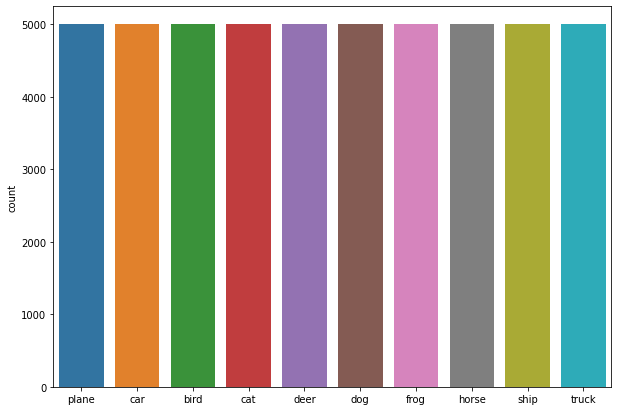

In [ ]:
plt.figure(figsize=(10,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=clases)

Vemos que cada Clase cuenta con 5000 registros, por lo que la data se encuentra totalmente balanceada.

- Reshape y Normalizacion:

Dado que los valores en nuestro conjunto de datos x_train son imágenes de 32x32 y de 3 canales, nuestra forma de entrada debe especificarse para que nuestro modelo sepa lo que se está ingresando.

Además, para nuestro dataset CIFAR10, queremos que cada valor esté entre 0,0 y 1,0. Como todos los valores originalmente caen dentro del rango de 0.0-255.0, vamos a dividir por 255.0

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train = x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test = x_test / 255.0

Las etiquetas para el conjunto de datos de entrenamiento y prueba son actualmente categóricas y no son continuas. Para incluir conjuntos de datos categóricos en nuestro modelo, nuestras etiquetas deben convertirse en codificaciones one-hot.

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

- Crear una Red Neuronal simple con el modo Sequential

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.SGD()
model.compile(optimizer = opt,
              loss ='categorical_crossentropy',
              metrics = ['accuracy','mse'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
2500/2500 [==============================] - 9s 3ms/step - loss: 1.8956 - accuracy: 0.3162 - mse: 0.0799 - val_loss: 1.7982 - val_accuracy: 0.3538 - val_mse: 0.0768
Epoch 2/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.7090 - accuracy: 0.3892 - mse: 0.0742 - val_loss: 1.6569 - val_accuracy: 0.4173 - val_mse: 0.0724
Epoch 3/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.6277 - accuracy: 0.4191 - mse: 0.0715 - val_loss: 1.7192 - val_accuracy: 0.3857 - val_mse: 0.0747
Epoch 4/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.5726 - accuracy: 0.4423 - mse: 0.0696 - val_loss: 1.5628 - val_accuracy: 0.4489 - val_mse: 0.0689
Epoch 5/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.5317 - accuracy: 0.4525 - mse: 0.0682 - val_loss: 1.5454 - val_accuracy: 0.4541 - val_mse: 0.0684
Epoch 6/100
2500/2500 [==============================] - 9s 4ms/step - loss: 1.4980 - accuracy: 0.4660 - mse: 0.067

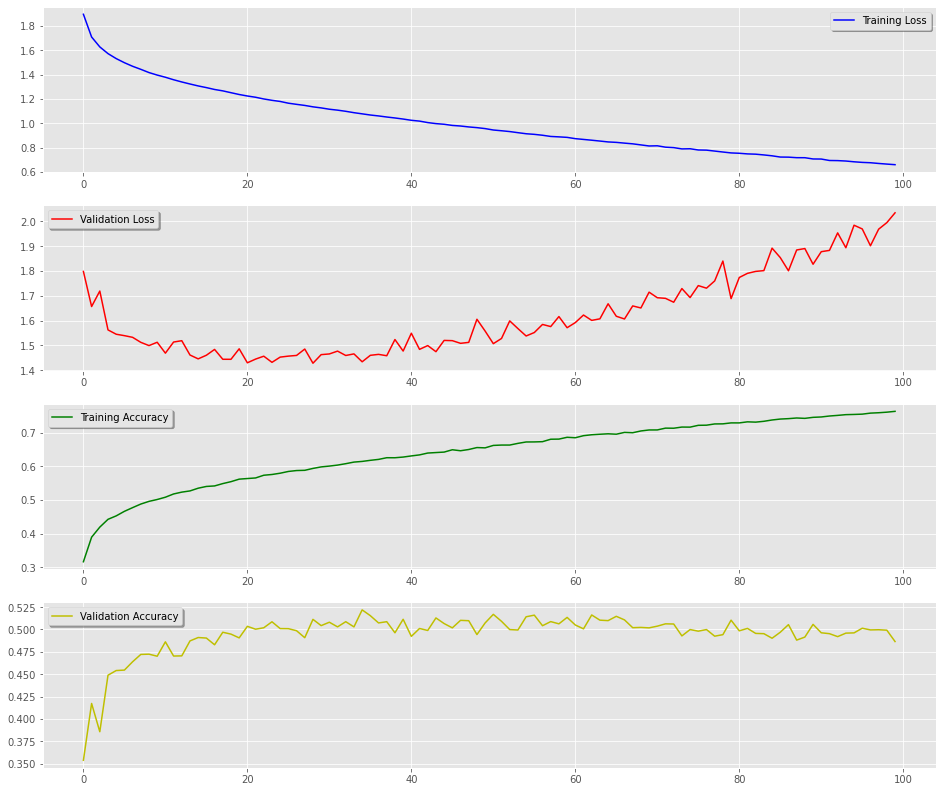

In [ ]:
fig, ax = plt.subplots(4,1, figsize=(16,14))
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['val_loss'], color='r', label="Validation Loss")
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(history.history['accuracy'], color='g', label="Training Accuracy")
legend = ax[2].legend(loc='best', shadow=True)

ax[3].plot(history.history['val_accuracy'], color='y', label="Validation Accuracy")
legend = ax[3].legend(loc='best', shadow=True)



In [ ]:
test_loss, test_acc, test_mse = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.0160 - accuracy: 0.4875 - mse: 0.0739


In [ ]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

[[Text(0, 0.5, 'plane'),
  Text(0, 1.5, 'car'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')],
 [Text(0.5, 0, 'plane'),
  Text(1.5, 0, 'car'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')]]

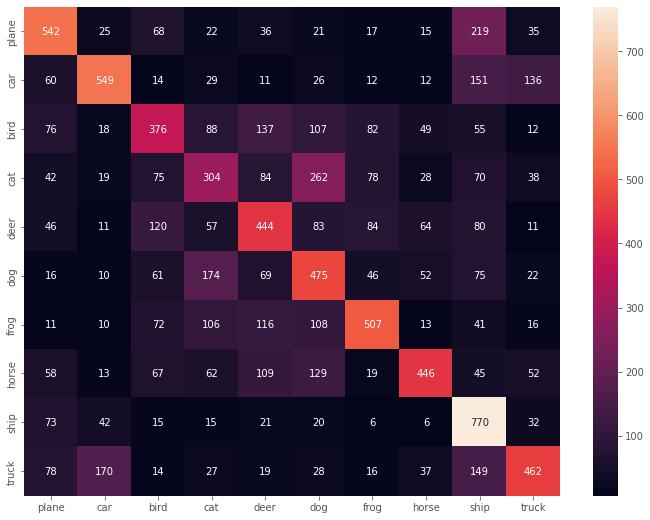

In [ ]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=clases, yticklabels=clases)

# PyTorch

In [ ]:
import torch
from torch import nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
print(device)

cuda:0


In [ ]:
transform = transforms.Compose([transforms.Resize((32,32)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

training_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform = transform) # Data augmentation is only done on training images
validation_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform = transform)
 
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=16, shuffle=True) # Batch size of 16 i.e to work with 16 images at a time
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size =16, shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
training_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [ ]:
validation_dataset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [ ]:
# We need to convert the images to numpy arrays as tensors are not compatible with matplotlib.
def im_convert(tensor):  
  image = tensor.cpu().clone().detach().numpy() # This process will happen in normal cpu.
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

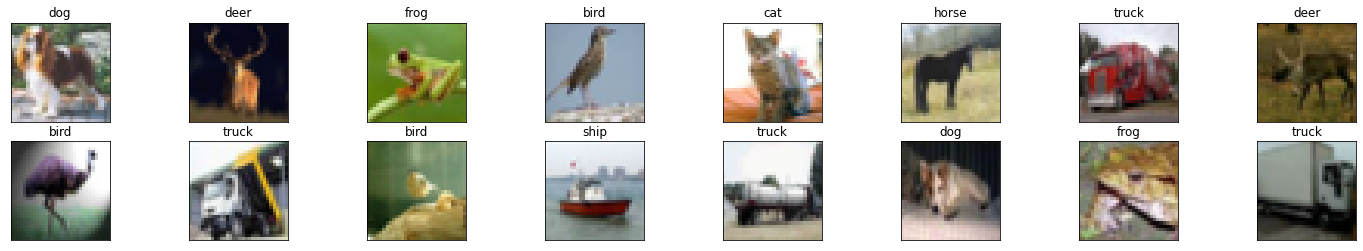

In [ ]:
# We iter the batch of images to display
dataiter = iter(training_loader) # converting our train_dataloader to iterable so that we can iter through it. 
images, labels = dataiter.next() #going from 1st batch of 100 images to the next batch
fig = plt.figure(figsize=(25, 4)) 

# We plot 20 images from our train_dataset
for idx in np.arange(16):
  ax = fig.add_subplot(2, 8, idx+1, xticks=[], yticks=[]) 
  plt.imshow(im_convert(images[idx])) #converting to numpy array as plt needs it.
  ax.set_title(clases[labels[idx].item()])

In [ ]:
'''
model_pt = nn.Sequential(nn.Flatten(),
                        nn.Linear(3072, 128),
                        nn.ReLU(),
                        nn.Linear(128, 64),
                        nn.ReLU(),
                        nn.Linear(64, 10),
                        nn.LogSoftmax(dim=1))

print(model_pt)
'''

model_pt = nn.Sequential(nn.Flatten(),
                        nn.Linear(3072, 128),
                        nn.ReLU(),
                        nn.Linear(128, 64),
                        nn.ReLU(),
                        nn.Linear(64, 10))

print(model_pt)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
optimizer = optim.SGD(model_pt.parameters(),lr=0.0001,momentum=0.9)
#criterion = nn.NLLLoss() # same as categorical_crossentropy loss used in Keras models which runs on Tensorflow

criterion = nn.CrossEntropyLoss()
# Otra opción es que la última capa de tu modelo sea Linear, sin softmax, y usar CrossEntropyLoss.

In [ ]:
model_pt.to(device) # run our model on cuda GPU for faster results

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
num_epoch = 100
train_losses=[]
valid_losses=[]



for epoch in range(1,num_epoch+1):
  train_loss=0.0
  valid_loss=0.0

  model_pt.train()
  for img,lbl in training_loader:
    img=img.cuda()
    lbl=lbl.cuda()

    optimizer.zero_grad()
    predict=model_pt(img)
    loss=criterion(predict,lbl)
    loss.backward()
    optimizer.step()
    train_loss+=loss.item()*img.size(0)

  model_pt.eval()
  correct = 0
  total = 0
  for img,lbl in validation_loader:
    img=img.cuda()
    lbl=lbl.cuda()

    predict=model_pt(img)
    _, lbl_pred = torch.max(predict.data, 1)

    loss=criterion(predict,lbl)

    valid_loss+=loss.item()*img.size(0)

    total += lbl.size(0)
    correct += (lbl_pred == lbl).sum().item()


  train_loss=train_loss/len(training_loader.sampler) 
  valid_loss=valid_loss/len(validation_loader.sampler)

  train_losses.append(train_loss)
  valid_losses.append(valid_loss)

  

  print('Epoch:{} Train Loss:{:.4f} valid Loss:{:.4f}'.format(epoch,train_loss,valid_loss)) 

print(f'Accuracy del modelo sobre el dataset de prueba: {100 * correct / total}%')

Epoch:1 Train Loss:2.2130 valid Loss:2.0938
Epoch:2 Train Loss:2.0058 valid Loss:1.9200
Epoch:3 Train Loss:1.8714 valid Loss:1.8202
Epoch:4 Train Loss:1.7901 valid Loss:1.7527
Epoch:5 Train Loss:1.7310 valid Loss:1.6997
Epoch:6 Train Loss:1.6859 valid Loss:1.6606
Epoch:7 Train Loss:1.6503 valid Loss:1.6306
Epoch:8 Train Loss:1.6195 valid Loss:1.6038
Epoch:9 Train Loss:1.5920 valid Loss:1.5817
Epoch:10 Train Loss:1.5671 valid Loss:1.5600
Epoch:11 Train Loss:1.5440 valid Loss:1.5419
Epoch:12 Train Loss:1.5219 valid Loss:1.5259
Epoch:13 Train Loss:1.5006 valid Loss:1.5116
Epoch:14 Train Loss:1.4801 valid Loss:1.4949
Epoch:15 Train Loss:1.4607 valid Loss:1.4819
Epoch:16 Train Loss:1.4418 valid Loss:1.4649
Epoch:17 Train Loss:1.4228 valid Loss:1.4538
Epoch:18 Train Loss:1.4048 valid Loss:1.4421
Epoch:19 Train Loss:1.3876 valid Loss:1.4317
Epoch:20 Train Loss:1.3713 valid Loss:1.4221
Epoch:21 Train Loss:1.3546 valid Loss:1.4110
Epoch:22 Train Loss:1.3384 valid Loss:1.4017
Epoch:23 Train Loss

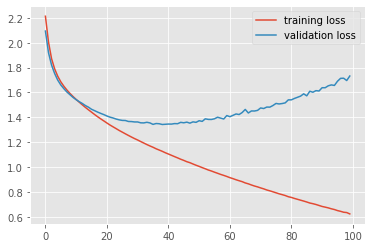

In [ ]:
plt.style.use('ggplot')
plt.plot(train_losses, label='training loss')
plt.plot(valid_losses, label='validation loss')
plt.legend()